# Sky Blue
Pollutants are a mix of harmful particles and gases in the atmosphere that results in air pollution. Higher and unhealthy concentrations of air pollutants lead to diseases, unsustainable household and industrial productions, and uninhabitable ecosystems. This research will focus on the air condition in Beijing, China and aims to seek possible solutions to improve the air quality by analyzing factors that affect the pollutants value. Beijing experienced relatively severe pollution in the 2010s because of the high-speed development of the economy and heavy traffic. This research uses a time series dataset of daily observations for 12 sites in Beijing from 2013 to 2017, and we will use regression models to find out some insights of the data as well as give a specific prediction model for the pollution.

In this analysis, we will clean up the data including obtaining the mean and max value of the air pollution data for each day so that we can do an exploratory analysis and make some plots about the difference of air pollution for each checking point. What’s more, we also demonstrate seasonal patterns and trends to get a deeper insight about the time-series data. Next, we will build models such as gradient boosting regression to predict whether the pollution level would go up or not in the future. We will first split our data into training, validation and testing data and then tune our hyperparameter such as the depth of our trees on training dataset. Furthermore, we will use model performance measures like RMSE to select the best model. After all these, we can get our overall predicted accuracy in our test data.

Our results will show that whether human sources, such as industry and transport, and natural sources, such as hour or weather would have significant effects on air quality or not. Results will also reveal which specific factor that has the most impact on the pollutant concentrations in each station. We also want to find out the pollution level between urban and rural, for example CO pollutants may have more severe impact in urban sites because of the exhaust emissions. To accomplish that, we need to import some external data such as the traffic and industrial data around the monitor site to figure out the external factor that influences the amount of pollution as well as how we can put forward some useful recommendations for the governments.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

## Section 1: Data Acquisition and Data Cleaning
1.1 Group files
<br>1.2 Create new variable 'Date'
<br>1.3 Managing missing data
<br>1.4 Indexing, selection, and filtering
<br>1.5 Merging and reshaping data

### 1.1 Group files 
We have 12 datasets and each is about the air quality deteceted by a station, the following code is to group the 12 datasets to one dataframe and then add a new variable "Date" and process null value.

In [2]:
#Read all files
path = "/Users/Shirley/Desktop/758XPython/project/PRSA_Data_20130301-20170228/"
df1=pd.read_csv(path + 'PRSA_Data_Aotizhongxin_20130301-20170228.csv')
df2=pd.read_csv(path + 'PRSA_Data_Changping_20130301-20170228.csv')
df3=pd.read_csv(path + 'PRSA_Data_Dingling_20130301-20170228.csv')
df4=pd.read_csv(path + 'PRSA_Data_Dongsi_20130301-20170228.csv')
df5=pd.read_csv(path + 'PRSA_Data_Guanyuan_20130301-20170228.csv')
df6=pd.read_csv(path + 'PRSA_Data_Gucheng_20130301-20170228.csv')
df7=pd.read_csv(path + 'PRSA_Data_Huairou_20130301-20170228.csv')
df8=pd.read_csv(path + 'PRSA_Data_Nongzhanguan_20130301-20170228.csv')
df9=pd.read_csv(path + 'PRSA_Data_Shunyi_20130301-20170228.csv')
df10=pd.read_csv(path + 'PRSA_Data_Tiantan_20130301-20170228.csv')
df11=pd.read_csv(path + 'PRSA_Data_Wanliu_20130301-20170228.csv')
df12=pd.read_csv(path + 'PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [3]:
#Concanate all files 
frames=[df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]
df = pd.concat(frames)
df.drop(['No'], axis=1, inplace=True)

### 1.2 Create new variable 'Date' 
First, we need to create a new column called 'Date' which concate columns 'year', 'month, and 'day' because we want to analyze our data by days. We then transform these three columns to string types and then combine them together.

In [4]:
#Create new varaible 'Date'
df[['year', 'month', 'day']]=df[['year', 'month', 'day']].astype(str)
df["Date"] = df[['month', 'day', 'year']].agg('/'.join, axis=1)
def func_time(x):
    x = datetime.strptime(x,'%m/%d/%Y')
    return x
df['Date'] = df['Date'].apply(func_time)

### 1.3 Managing missing data 
We observed that some of our variables have null values, then we fill these nulls with the mean of its column. For those varibles cannot fill in the mean value, we drop them.

In [5]:
#process null value
#fill null value with the mean value of the data at the station
df=df.fillna(df.groupby(['station', 'Date']).transform('mean'))
#some data has completely null value for all 24 hours, also the datatype of 'wd' is object 
#which we cant fill null with mean value, so we need to drop them 
df.dropna(inplace=True)
df.isnull().sum()

year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
Date       0
dtype: int64

### 1.4 Indexing, selection, and filtering 

Next, we can group our data by date to get the mean and max value of each pollutant for each day.

In [6]:
#Add suffix for each pollutant
ddf2=df.groupby(['Date', 'station']).mean()[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].add_suffix('Mean')
ddf2

PM2.5Mean   PM10Mean    SO2Mean    NO2Mean  \
Date       station                                                     
2013-03-01 Aotizhongxin    7.125000  10.750000  11.708333  22.583333   
           Changping       5.083333  18.958333  16.041667  15.333333   
           Dingling        6.375000   6.409091   3.000000   2.625000   
           Dongsi          6.416667   9.875000   8.478261  28.521739   
           Guanyuan        7.541667  11.666667   8.500000  28.500000   
...                             ...        ...        ...        ...   
2017-02-28 Nongzhanguan   17.523810  24.739130   7.347826  35.652174   
           Shunyi         20.708333  28.500000   7.125000  39.666667   
           Tiantan        14.875000  32.708333   6.454545  42.904762   
           Wanliu          9.958333  25.583333   7.458333  40.916667   
           Wanshouxigong  10.958333  21.541667   4.956522  31.391304   

                              COMean     O3Mean   TEMPMean     PRESMean  \
Date       station                                                        
2013-03-01 Aotizhongxin   429.166667  63.875000   1.391667  1026.875000   
           Changping      387.500000  77.791667   0.812500  1023.858333   
           Dingling       204.166667  81.958333   0.812500  1023.858333   
           Dongsi         395.652174  72.782609   1.325000  1028.783333   
           Guanyuan       400.000000  63.166667   1.391667  1026.875000   
...                              ...        ...        ...          ...   
2017-02-28 Nongzhanguan   526.086957  56.086957  10.958333  1014.887500   
           Shunyi         579.166667  57.291667   9.250000  1015.550000   
           Tiantan        540.909091  57.600000  10.958333  1014.887500   
           Wanliu         479.166667  54.791667  10.516667  1013.345833   
           Wanshouxigong  530.434783  54.913043  10.958333  1014.887500   

                           DEWPMean  RAINMean  WSPMMean  
Date       station                                       
2013-03-01 Aotizhongxin  -18.745833       0.0  3.254167  
           Changping     -19.583333       0.0  2.133333  
           Dingling      -19.583333       0.0  2.133333  
           Dongsi        -21.466667       0.0  3.308333  
           Guanyuan      -18.745833       0.0  3.254167  
...                             ...       ...       ...  
2017-02-28 Nongzhanguan  -12.783333       0.0  2.058333  
           Shunyi        -10.429167       0.0  2.025000  
           Tiantan       -12.783333       0.0  2.058333  
           Wanliu        -12.266667       0.0  1.800000  
           Wanshouxigong -12.783333       0.0  2.058333  

[16966 rows x 11 columns]

In [7]:
ddf3=df.groupby(['Date', 'station']).max()[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].add_suffix('Max')
ddf3

PM2.5Max  PM10Max  SO2Max  NO2Max   COMax  O3Max
Date       station                                                        
2013-03-01 Aotizhongxin       24.0     24.0    26.0    57.0   700.0   77.0
           Changping          11.0    101.0    43.0    42.0   700.0   94.0
           Dingling           14.0     10.0     3.0     4.0   300.0   89.0
           Dongsi             19.0     23.0    17.0    60.0   700.0   92.0
           Guanyuan           14.0     28.0    24.0    60.0   600.0   79.0
...                            ...      ...     ...     ...     ...    ...
2017-02-28 Nongzhanguan       74.0    121.0    22.0   101.0  1700.0   94.0
           Shunyi             69.0     72.0    17.0    92.0  1200.0   99.0
           Tiantan            62.0    104.0    21.0   109.0  1500.0   94.0
           Wanliu             21.0     49.0    16.0    88.0   900.0  100.0
           Wanshouxigong      40.0     51.0    11.0    85.0  1200.0   87.0

[16966 rows x 6 columns]

### 1.5 Merging and reshaping data
After we get the mean and max value of each pollutant for each day, we combine merge two dataframes.

In [8]:
ddf4=pd.merge(ddf2, ddf3, on=["Date", 'station'])
ddf4

PM2.5Mean   PM10Mean    SO2Mean    NO2Mean  \
Date       station                                                     
2013-03-01 Aotizhongxin    7.125000  10.750000  11.708333  22.583333   
           Changping       5.083333  18.958333  16.041667  15.333333   
           Dingling        6.375000   6.409091   3.000000   2.625000   
           Dongsi          6.416667   9.875000   8.478261  28.521739   
           Guanyuan        7.541667  11.666667   8.500000  28.500000   
...                             ...        ...        ...        ...   
2017-02-28 Nongzhanguan   17.523810  24.739130   7.347826  35.652174   
           Shunyi         20.708333  28.500000   7.125000  39.666667   
           Tiantan        14.875000  32.708333   6.454545  42.904762   
           Wanliu          9.958333  25.583333   7.458333  40.916667   
           Wanshouxigong  10.958333  21.541667   4.956522  31.391304   

                              COMean     O3Mean   TEMPMean     PRESMean  \
Date       station                                                        
2013-03-01 Aotizhongxin   429.166667  63.875000   1.391667  1026.875000   
           Changping      387.500000  77.791667   0.812500  1023.858333   
           Dingling       204.166667  81.958333   0.812500  1023.858333   
           Dongsi         395.652174  72.782609   1.325000  1028.783333   
           Guanyuan       400.000000  63.166667   1.391667  1026.875000   
...                              ...        ...        ...          ...   
2017-02-28 Nongzhanguan   526.086957  56.086957  10.958333  1014.887500   
           Shunyi         579.166667  57.291667   9.250000  1015.550000   
           Tiantan        540.909091  57.600000  10.958333  1014.887500   
           Wanliu         479.166667  54.791667  10.516667  1013.345833   
           Wanshouxigong  530.434783  54.913043  10.958333  1014.887500   

                           DEWPMean  RAINMean  WSPMMean  PM2.5Max  PM10Max  \
Date       station                                                           
2013-03-01 Aotizhongxin  -18.745833       0.0  3.254167      24.0     24.0   
           Changping     -19.583333       0.0  2.133333      11.0    101.0   
           Dingling      -19.583333       0.0  2.133333      14.0     10.0   
           Dongsi        -21.466667       0.0  3.308333      19.0     23.0   
           Guanyuan      -18.745833       0.0  3.254167      14.0     28.0   
...                             ...       ...       ...       ...      ...   
2017-02-28 Nongzhanguan  -12.783333       0.0  2.058333      74.0    121.0   
           Shunyi        -10.429167       0.0  2.025000      69.0     72.0   
           Tiantan       -12.783333       0.0  2.058333      62.0    104.0   
           Wanliu        -12.266667       0.0  1.800000      21.0     49.0   
           Wanshouxigong -12.783333       0.0  2.058333      40.0     51.0   

                          SO2Max  NO2Max   COMax  O3Max  
Date       station                                       
2013-03-01 Aotizhongxin     26.0    57.0   700.0   77.0  
           Changping        43.0    42.0   700.0   94.0  
           Dingling          3.0     4.0   300.0   89.0  
           Dongsi           17.0    60.0   700.0   92.0  
           Guanyuan         24.0    60.0   600.0   79.0  
...                          ...     ...     ...    ...  
2017-02-28 Nongzhanguan     22.0   101.0  1700.0   94.0  
           Shunyi           17.0    92.0  1200.0   99.0  
           Tiantan          21.0   109.0  1500.0   94.0  
           Wanliu           16.0    88.0   900.0  100.0  
           Wanshouxigong    11.0    85.0  1200.0   87.0  

[16966 rows x 17 columns]

Then we add stations and wd into our dataframe. We notice that wd may have different values within a day, and we just use the mode.

In [9]:
ddf5=df.groupby(['Date', 'station'])['wd'].agg(lambda x:x.value_counts().index[0])

In [10]:
ddf6=pd.merge(ddf4, ddf5, on=['Date', 'station'])
ddf6

PM2.5Mean   PM10Mean    SO2Mean    NO2Mean  \
Date       station                                                     
2013-03-01 Aotizhongxin    7.125000  10.750000  11.708333  22.583333   
           Changping       5.083333  18.958333  16.041667  15.333333   
           Dingling        6.375000   6.409091   3.000000   2.625000   
           Dongsi          6.416667   9.875000   8.478261  28.521739   
           Guanyuan        7.541667  11.666667   8.500000  28.500000   
...                             ...        ...        ...        ...   
2017-02-28 Nongzhanguan   17.523810  24.739130   7.347826  35.652174   
           Shunyi         20.708333  28.500000   7.125000  39.666667   
           Tiantan        14.875000  32.708333   6.454545  42.904762   
           Wanliu          9.958333  25.583333   7.458333  40.916667   
           Wanshouxigong  10.958333  21.541667   4.956522  31.391304   

                              COMean     O3Mean   TEMPMean     PRESMean  \
Date       station                                                        
2013-03-01 Aotizhongxin   429.166667  63.875000   1.391667  1026.875000   
           Changping      387.500000  77.791667   0.812500  1023.858333   
           Dingling       204.166667  81.958333   0.812500  1023.858333   
           Dongsi         395.652174  72.782609   1.325000  1028.783333   
           Guanyuan       400.000000  63.166667   1.391667  1026.875000   
...                              ...        ...        ...          ...   
2017-02-28 Nongzhanguan   526.086957  56.086957  10.958333  1014.887500   
           Shunyi         579.166667  57.291667   9.250000  1015.550000   
           Tiantan        540.909091  57.600000  10.958333  1014.887500   
           Wanliu         479.166667  54.791667  10.516667  1013.345833   
           Wanshouxigong  530.434783  54.913043  10.958333  1014.887500   

                           DEWPMean  RAINMean  WSPMMean  PM2.5Max  PM10Max  \
Date       station                                                           
2013-03-01 Aotizhongxin  -18.745833       0.0  3.254167      24.0     24.0   
           Changping     -19.583333       0.0  2.133333      11.0    101.0   
           Dingling      -19.583333       0.0  2.133333      14.0     10.0   
           Dongsi        -21.466667       0.0  3.308333      19.0     23.0   
           Guanyuan      -18.745833       0.0  3.254167      14.0     28.0   
...                             ...       ...       ...       ...      ...   
2017-02-28 Nongzhanguan  -12.783333       0.0  2.058333      74.0    121.0   
           Shunyi        -10.429167       0.0  2.025000      69.0     72.0   
           Tiantan       -12.783333       0.0  2.058333      62.0    104.0   
           Wanliu        -12.266667       0.0  1.800000      21.0     49.0   
           Wanshouxigong -12.783333       0.0  2.058333      40.0     51.0   

                          SO2Max  NO2Max   COMax  O3Max   wd  
Date       station                                            
2013-03-01 Aotizhongxin     26.0    57.0   700.0   77.0    N  
           Changping        43.0    42.0   700.0   94.0   NE  
           Dingling          3.0     4.0   300.0   89.0   NE  
           Dongsi           17.0    60.0   700.0   92.0  NNW  
           Guanyuan         24.0    60.0   600.0   79.0    N  
...                          ...     ...     ...    ...  ...  
2017-02-28 Nongzhanguan     22.0   101.0  1700.0   94.0   NW  
           Shunyi           17.0    92.0  1200.0   99.0   NW  
           Tiantan          21.0   109.0  1500.0   94.0   NW  
           Wanliu           16.0    88.0   900.0  100.0    N  
           Wanshouxigong    11.0    85.0  1200.0   87.0   NW  

[16966 rows x 18 columns]

In [11]:
ddf6['wd']

Date        station      
2013-03-01  Aotizhongxin       N
            Changping         NE
            Dingling          NE
            Dongsi           NNW
            Guanyuan           N
                            ... 
2017-02-28  Nongzhanguan      NW
            Shunyi            NW
            Tiantan           NW
            Wanliu             N
            Wanshouxigong     NW
Name: wd, Length: 16966, dtype: object

### 1.6 Data Preparation for Seasonal Analysis
In the dataset, it is given the pollutant value for every hour each day at 12 stations. The following code is meant to find the max value of pollutant in each day at each station and also the hour corresponding to the appearance of first max value.

In [12]:
#define function-find the max value of each pollutant and related hour in each day in each station 
def findmax(df, value):
    df2=df.groupby(['station', 'Date'])[value].max()
    df3=pd.DataFrame(df2)
    df4=pd.merge(df[['station', 'Date', 'hour', value]], df2, on=["Date", "station", value], how='inner')
    return df4

In [13]:
#apply function on each pollutant and rename max hour for each pollutant
df_SO2= findmax(df, 'SO2').rename(columns={"hour": "SO2 1st Max Hour"})
df_NO2 = findmax(df, 'NO2').rename(columns={"hour": "NO2 1st Max Hour"})
df_CO = findmax(df, 'CO').rename(columns={"hour": "CO 1st Max Hour"})
df_O3 = findmax(df, 'O3').rename(columns={"hour": "O3 1st Max Hour"})

In [14]:
#clean format
df_SO2= pd.DataFrame(df_SO2.groupby(['station', 'Date', 'SO2'])['SO2 1st Max Hour'].min()).reset_index()
df_O3 = pd.DataFrame(df_O3.groupby(['station', 'Date', 'O3'])['O3 1st Max Hour'].min()).reset_index()
df_CO = pd.DataFrame(df_CO.groupby(['station', 'Date', 'CO'])['CO 1st Max Hour'].min()).reset_index()
df_NO2 = pd.DataFrame(df_NO2.groupby(['station', 'Date', 'NO2'])['NO2 1st Max Hour'].min()).reset_index()

## Section 2 Data Patterns
2.1 Geographical Analysis
<br>2.2 Data Prepartion
<br>2.3 Panel

### 2.1 Geographical Analysis 
We'll take a look at the location of each station and group them for better analysis.

In [15]:
#Get a list of station
Sta=list(pd.unique(df.station))
Sta

['Aotizhongxin',
 'Changping',
 'Dingling',
 'Dongsi',
 'Guanyuan',
 'Gucheng',
 'Huairou',
 'Nongzhanguan',
 'Shunyi',
 'Tiantan',
 'Wanliu',
 'Wanshouxigong']

In [16]:
#google the coordinated for each station
Longtitude=[116.407, 116.23, 116.17, 116.434, 116.361, 116.225, 116.644,116.473, 116.72, 116.434, 116.315, 116.366]
Latitude = [40.0031, 40.1952, 40.2865, 39.9522, 39.9425, 39.9279, 40.3937, 39.9716, 40.1438, 39.8745, 39.9934, 39.8673]

In [17]:
location=pd.DataFrame({'Station':Sta,'Longitude':Longtitude, 'Latitude':Latitude})

In [18]:
#visualize the location of each station
%pylab inline
import plotly.graph_objects as go
mapbox_access_token = 'pk.eyJ1IjoieHVlbGluZzExMDkiLCJhIjoiY2s5ZGF3M3RiMDF0ZDNnbnFya3EwMHloZiJ9.eKzDHTuUnEuQLyywpldF4w'
beijing_map_data = go.Scattermapbox(
        lon = location['Longitude'],
        lat = location['Latitude'],
        text = location['Station'],
        hoverinfo='text',
        mode = 'markers',
        marker = dict(
                    color = 'red',
                    symbol = 'circle',
                    opacity = .5
                )
)

beijing__map_layout = go.Layout(
        title = 'Beijing Air Quality Station',
        mapbox=go.layout.Mapbox(
            accesstoken=mapbox_access_token,
            zoom=2
        )
    )
beijing__map = go.Figure(data=beijing_map_data, layout=beijing__map_layout)
beijing__map.show()

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


From the map, we can group 12 stations to two groups: countryside and downtwon.

In [19]:
countryside=['Dingling', 'Changping', 'Huairou', 'Shunyi']
downtown=list(set(Sta)-set(countryside))

## 2.2 Data Preparation
After define region, we can see the distribution of each pollutants for the two regions, but first let's group data from each region

In [20]:
data=ddf6.reset_index()
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data['day'] = pd.DatetimeIndex(data['Date']).day

In [21]:
all_region = {'countryside':countryside, 'downtown':downtown}
data['Downtown']=np.where(data['station'].isin(downtown), 0, 1)
data1 = data.set_index(keys=['station', 'Date']).sort_index(level=[0,1])

In [22]:
#get variable names
pollutant_keys1 = ['NO2', 'O3', 'SO2', 'CO']
pollutant_vals = ['Mean', 'Max']
all_indicators = []
for x1 in pollutant_keys1:
    for x2 in pollutant_vals:
        all_indicators.append(x1+x2)

In [23]:
identifier = ['station', 'Date']
time_feature = ['year', 'month', 'day']

data2 = data1[all_indicators].reset_index()
data2.head()

station       Date     NO2Mean  NO2Max     O3Mean  O3Max    SO2Mean  \
0  Aotizhongxin 2013-03-01   22.583333    57.0  63.875000   77.0  11.708333   
1  Aotizhongxin 2013-03-02   66.666667   110.0  29.750000   52.0  36.625000   
2  Aotizhongxin 2013-03-03   81.000000   135.0  19.125000   77.0  61.291667   
3  Aotizhongxin 2013-03-04   46.956522    86.0  53.750000   84.0  22.869565   
4  Aotizhongxin 2013-03-05  132.833333   204.0  68.458333   84.0  93.875000   

   SO2Max       COMean   COMax  
0    26.0   429.166667   700.0  
1    87.0   824.916667  1700.0  
2   135.0  1620.625000  2799.0  
3    51.0   617.391304  1300.0  
4   147.0  2357.958333  4400.0

In [24]:
cols = [x+pollutant_vals[0] for x in pollutant_keys1]
dff0 = data[data['Downtown'] == 0][['Date'] + cols]
dff0.columns = ['Date'] + ['Countryside' +' '+x for x in cols]
dff1 = data[data['Downtown'] == 1][['Date'] + cols]
dff1.columns = ['Date'] + ['Downtown' +' '+x for x in cols]
dff = pd.merge(dff0,dff1,how='outer',on=['Date','Date'])
dff = dff.dropna().reset_index(drop=True)
dff.head()

Date  Countryside NO2Mean  Countryside O3Mean  Countryside SO2Mean  \
0 2013-03-01            22.583333           63.875000            11.708333   
1 2013-03-01            22.583333           63.875000            11.708333   
2 2013-03-01            22.583333           63.875000            11.708333   
3 2013-03-01            22.583333           63.875000            11.708333   
4 2013-03-01            28.521739           72.782609             8.478261   

   Countryside COMean  Downtown NO2Mean  Downtown O3Mean  Downtown SO2Mean  \
0          429.166667         15.333333        77.791667         16.041667   
1          429.166667          2.625000        81.958333          3.000000   
2          429.166667         12.350000        78.217391         15.956522   
3          429.166667         13.000000        62.478261          3.000000   
4          395.652174         15.333333        77.791667         16.041667   

   Downtown COMean  
0       387.500000  
1       204.166667  
2       339.130435  
3       352.173913  
4       387.500000

### 2.3 Panel
Now we are ready to plot: below are the histograms of mean value of each pollution for the downtown and countryside

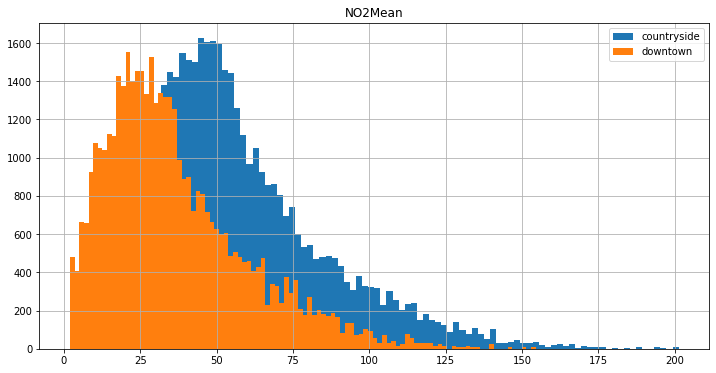

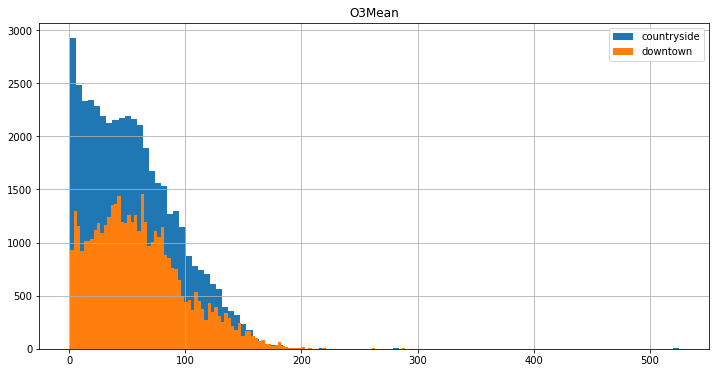

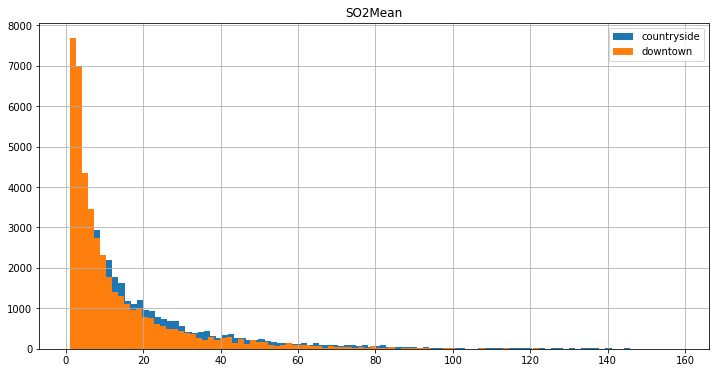

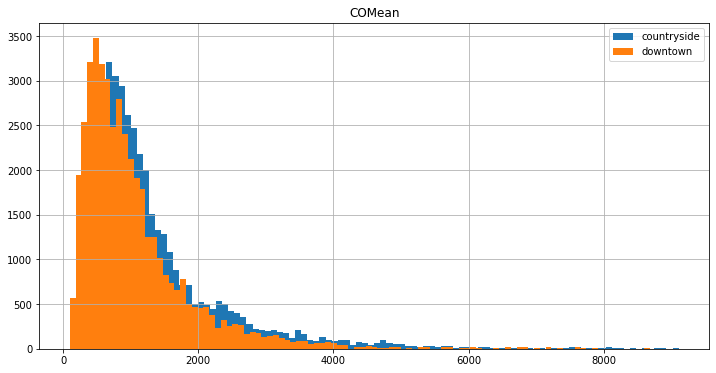

In [25]:
DD = dff.copy()
for k  in pollutant_keys1:
    key = k + pollutant_vals[0]
    plt.figure(figsize=(12,6))
    plt.title(key)
    DD['Countryside'+' '+key].hist(bins=100)
    DD['Downtown'+' '+key].hist(bins=100)
    plt.legend([x for x in all_region.keys()])
    plt.show()

Next, let's plot the changes of mean value of each pollution along time between two regions.

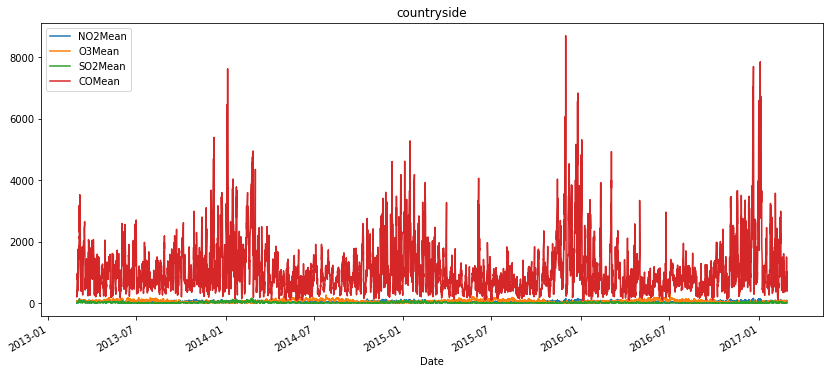

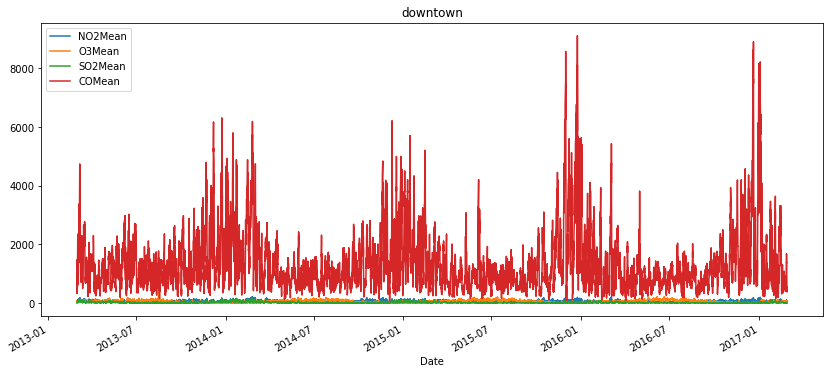

In [26]:
def plot_test(dd, key,region):
    dd = data2[data2['station'].isin(region)]
    dd.index = dd['Date']
    dd[[x+pollutant_vals[0] for x in pollutant_keys1]].plot(title=str(key), figsize=(14, 6))
    plt.show()
for key,values in all_region.items():
    plot_test(data2, key, values)

Appearantly, CO is way larger than other pollutants and it is hard to get obervation of other pollutants. Therefore, we can remove CO to see the change of other pollutants.

In [27]:
pollutant_keys2 = ['NO2', 'O3', 'SO2']
pollutant_vals = ['Mean', 'Max']
all_indicators2 = []
for x1 in pollutant_keys2:
    for x2 in pollutant_vals:
        all_indicators2.append(x1+x2)
identifier = ['station', 'Date']
time_feature = ['year', 'month', 'day']
data3 = data1[all_indicators2].reset_index()

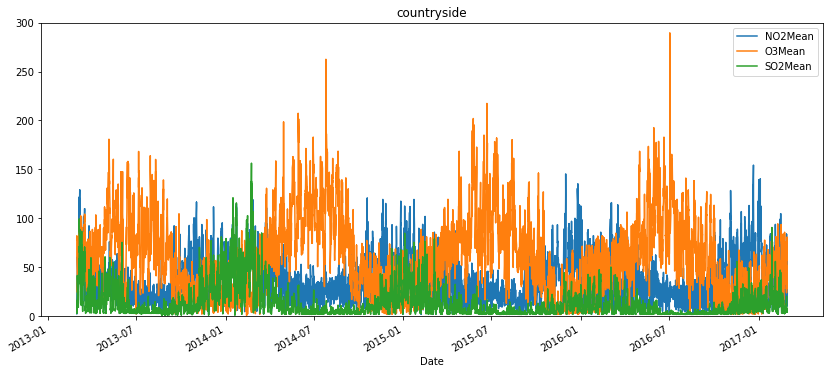

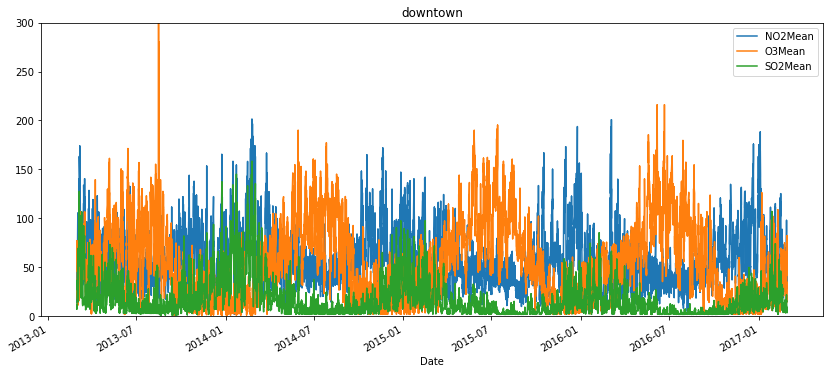

In [28]:
def plot_test(dd, key,region):
    dd = data3[data3['station'].isin(region)]
    dd.index = dd['Date']
    dd[[x+pollutant_vals[0] for x in pollutant_keys2]].plot(title=str(key), figsize=(14, 6))
    plt.ylim(0, 300)
    plt.show()
for key,values in all_region.items():
    plot_test(data3, key, values)

## Section3 Predictive Model
3.1 Data Preparation for model
<br> 3.2 Gradient Boosting v.s. Naive Model
<br> 3.3 Deep Learning Neural Network

###  3.1 Data Preparation for model 

In [29]:
indic = all_indicators.copy()
indic.append('wd')
indic

['NO2Mean',
 'NO2Max',
 'O3Mean',
 'O3Max',
 'SO2Mean',
 'SO2Max',
 'COMean',
 'COMax',
 'wd']

In [30]:
def find_mean(data1,region):
    dff2 = data1[indic].reset_index()
    dff3 = dff2[dff2['station'].isin(region)]
    DF1=dff3[['Date','NO2Mean','O3Mean','SO2Mean','COMean']].groupby('Date').mean()
    DF2=dff3[['Date','NO2Max','O3Max','SO2Max','COMax']].groupby('Date').max()
    DF3=dff3[['Date','wd']].groupby('Date').agg(lambda x: x.value_counts().index[0])
    DF4=pd.merge(DF1, DF2, on='Date')
    DF5=pd.merge(DF4, DF3, on='Date')
    dff3=DF5.reset_index().sort_values('Date', ascending=False)
    return dff3

In [31]:
def create_new_variable(all_indicators, target_index, df):
    target = all_indicators[target_index]
    labels = df[['Date',target]].copy()
    labels[target] = df[target].shift(-1)
    labels.columns = ['Date','label']
    #moving average: The window has 4 values, because the characteristics of the week are very obvious, 
    #and the 4 values represent the week, month, quarter, and year.
    windows = [7*i for i in [1,4,13,52]]
    self_df = df[all_indicators].copy()
    self_df0 = self_df.rolling(window=windows[0]).mean()
    self_df1 = self_df.rolling(window=windows[1]).mean()
    self_df2 = self_df.rolling(window=windows[2]).mean()
    self_df3 = self_df.rolling(window=windows[3]).mean()
    self_df0.columns = [x+'_'+str(windows[0]) for x in all_indicators]
    self_df1.columns = [x+'_'+str(windows[1]) for x in all_indicators]
    self_df2.columns = [x+'_'+str(windows[2]) for x in all_indicators]
    self_df3.columns = [x+'_'+str(windows[3]) for x in all_indicators]
    df = pd.concat([df,self_df0,self_df1,self_df2,self_df3],axis=1)
    df = pd.merge(labels,df,on=['Date','Date'],how='outer')
    df = df.dropna().reset_index(drop=True)
    df = pd.get_dummies(df, columns=['wd'])
    df = df.sort_values('Date')
    return df

### 3.2 Gradient Boosting v.s. Naive Model

Downtown:

In [32]:
m1=find_mean(data1,downtown)
m1=create_new_variable(all_indicators, 0, m1)

In [33]:
X = m1.drop(['Date','label'],axis=1)
y =m1['label']
train_begin = 0.6
dev_begin = 0.8
X_train = X[:int(train_begin*len(X))]
y_train = y[:int(train_begin*len(X))]
X_dev  = X[int(train_begin*len(X)):int(dev_begin*len(X))]
y_dev = y[int(train_begin*len(X)):int(dev_begin*len(X))]
X_test = X[int(dev_begin*len(X)):]
y_test = y[int(dev_begin*len(X)):]

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

model = GradientBoostingRegressor(max_depth=6,n_estimators=200,learning_rate=0.01)
model.fit(X_train,y_train)

# get the order of feature importance
impos = dict(zip(list(X_train.columns),list(model.feature_importances_)))
impos = sorted(impos.items(),key=lambda x:x[1],reverse=True)
impos = [x[0] for x in impos]

In [35]:
# According to the order of feature importance, the top n features are selected in turn, the validation 
# set is used to select the best rmse, and the features are filtered in order.
rmses = []
for i in range(1,len(X_train.columns)):
    cols = impos[:i]
    X_train1 = X_train[cols].copy()
    X_dev1 = X_dev[cols].copy()
    model = GradientBoostingRegressor(max_depth=6,n_estimators=200,learning_rate=0.01)
    model.fit(X_train1,y_train)
    rmses.append(mean_squared_error(y_dev,model.predict(X_dev1)))
    print(i,' done')

1  done
2  done
3  done
4  done
5  done
6  done
7  done
8  done
9  done
10  done
11  done
12  done
13  done
14  done
15  done
16  done
17  done
18  done
19  done
20  done
21  done
22  done
23  done
24  done
25  done
26  done
27  done
28  done
29  done
30  done
31  done
32  done
33  done
34  done
35  done
36  done
37  done
38  done
39  done
40  done
41  done
42  done
43  done
44  done
45  done
46  done
47  done
48  done
49  done
50  done
51  done
52  done
53  done
54  done
55  done


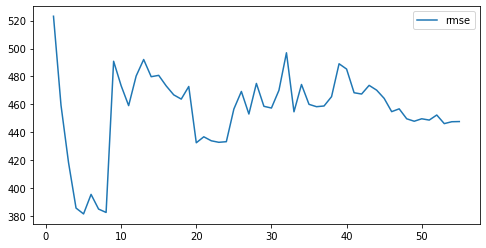

best N is : 5
Top N features are: ['NO2Mean', 'COMax', 'COMean', 'NO2Max', 'O3Mean']


In [36]:
plt.figure(figsize=(8,4))
plt.plot(list(range(1,len(X.columns))),rmses)
plt.legend(['rmse'])
plt.show()
print('best N is :',np.argmin(np.array(rmses))+1)
print('Top N features are:',impos[:np.argmin(np.array(rmses))+1])

model RMSE in test set is: 504.65044188716246
today predict tomorrow: 549.6294874704143


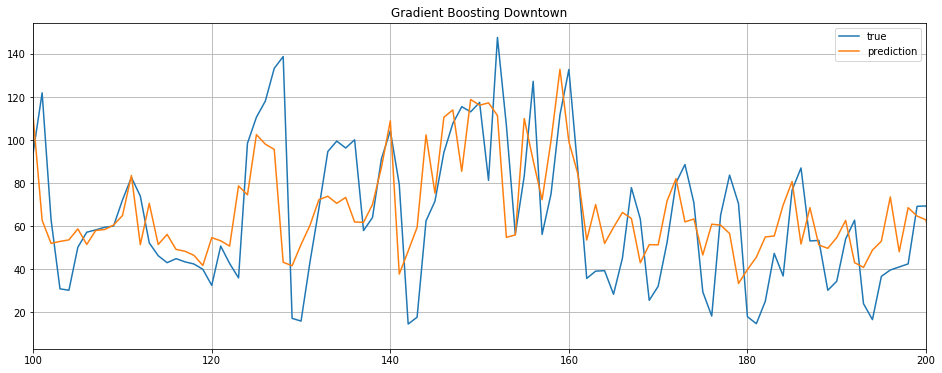

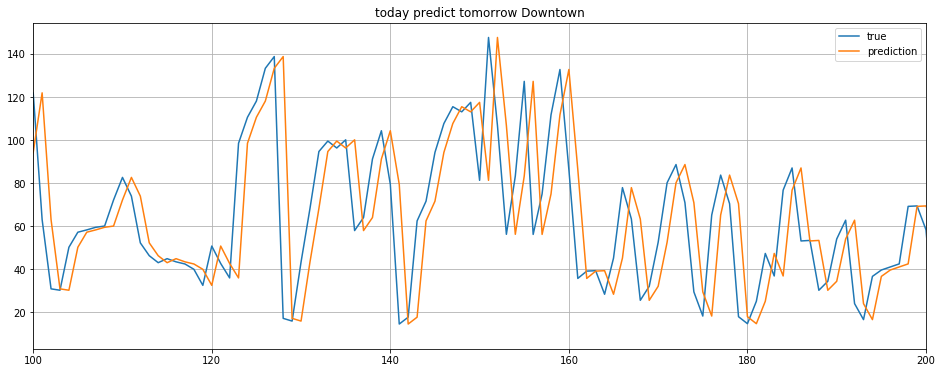

In [57]:
cols = impos[:np.argmin(np.array(rmses))+1]
X_train1 = X_train[cols].copy()
X_test1 = X_test[cols].copy()
model = GradientBoostingRegressor(max_depth=6,n_estimators=200,learning_rate=0.01)
model.fit(X_train1,y_train)
preds = model.predict(X_test1)
print('model RMSE in test set is:',mean_squared_error(y_test,preds))
print('today predict tomorrow:',mean_squared_error(list(y_test)[1:],list(y_test[:-1])))

plt.figure(figsize=(16,6))
plt.grid()
plt.title('Gradient Boosting Downtown')
plt.xlim(100,200) 
plt.plot(list(y_test))
plt.plot(preds)
plt.legend(['true','prediction'])
plt.show()

plt.figure(figsize=(16,6))
plt.grid()
plt.title('today predict tomorrow Downtown')
plt.xlim(100,200)
plt.plot(list(y_test)[1:])
plt.plot(list(y_test)[:-1])
plt.legend(['true','prediction'])
plt.show()

### 3.3 Deep Learning Neural Network

In [38]:
import tensorflow as tf

In [39]:
series = np.array(m1['label'])
time = np.array(m1['Date'])
# There are 3 years data of 1097 data points in series
split_time = round(1097*0.8)
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

In [40]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size+1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size+1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [41]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
print(train_set)
print(x_train.shape)

model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                         strides=1, padding='causal',
                         activation = "relu",
                         input_shape=[None,1]),                              
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation = "relu"),
  tf.keras.layers.Dense(10, activation = "relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x*400) #scaling this upwith match up with the order of output
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
    # lambda epoch: 0.001 * tf.math.exp(0.1 * (10 - epoch))) 
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model2.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model2.fit(train_set, epochs=100, callbacks=[lr_schedule])

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(878,)
Epoch 1/100
4/4 [==============================] - 18s 4s/step - loss: 59.6797 - root_mean_squared_error: 66.7072
Epoch 2/100
4/4 [==============================] - 3s 719ms/step - loss: 59.0680 - root_mean_squared_error: 66.3341
Epoch 3/100
4/4 [==============================] - 3s 855ms/step - loss: 58.4299 - root_mean_squared_error: 65.6202
Epoch 4/100
4/4 [==============================] - 4s 967ms/step - loss: 57.2900 - root_mean_squared_error: 64.6069
Epoch 5/100
4/4 [==============================] - 4s 1s/step - loss: 55.9103 - root_mean_squared_error: 63.3003
Epoch 6/100
4/4 [==============================] - 3s 804ms/step - loss: 54.2454 - root_mean_squared_error: 61.6984
Epoch 7/100
4/4 [==============================] - 3s 861ms/step - loss: 52.3533 - root_mean_squared_error: 59.8002
Epoch 8/100
4/4 [==============================] - 4s 1s/step - loss: 50.0208 - root_mean_sq

4/4 [==============================] - 4s 877ms/step - loss: 20.1778 - root_mean_squared_error: 25.9320
Epoch 71/100
4/4 [==============================] - 4s 964ms/step - loss: 20.2888 - root_mean_squared_error: 26.0006
Epoch 72/100
4/4 [==============================] - 3s 800ms/step - loss: 16.3818 - root_mean_squared_error: 21.8216
Epoch 73/100
4/4 [==============================] - 4s 928ms/step - loss: 16.2443 - root_mean_squared_error: 22.0984
Epoch 74/100
4/4 [==============================] - 4s 969ms/step - loss: 18.8222 - root_mean_squared_error: 24.9028
Epoch 75/100
4/4 [==============================] - 3s 844ms/step - loss: 19.9809 - root_mean_squared_error: 26.0914
Epoch 76/100
4/4 [==============================] - 3s 751ms/step - loss: 18.4480 - root_mean_squared_error: 23.5737
Epoch 77/100
4/4 [==============================] - 4s 969ms/step - loss: 16.9226 - root_mean_squared_error: 22.0738
Epoch 78/100
4/4 [==============================] - 4s 998ms/step - loss: 21.

[1e-08, 0.0001, 0, 60]

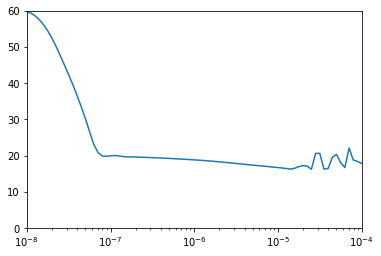

In [42]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 60])

In [43]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=shuffle_buffer_size)
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                         strides=1, padding='causal',
                         activation = "relu",
                         input_shape=[None,1]),                              
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation = "relu"),
  tf.keras.layers.Dense(10, activation = "relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x*400) #scaling this upwith match up with the order of output
])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model2.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model2.fit(train_set,epochs=150)

Epoch 1/150
9/9 [==============================] - 18s 2s/step - loss: 30.3406 - root_mean_squared_error: 39.8432
Epoch 2/150
9/9 [==============================] - 4s 473ms/step - loss: 20.9355 - root_mean_squared_error: 28.2000
Epoch 3/150
9/9 [==============================] - 4s 439ms/step - loss: 18.7636 - root_mean_squared_error: 25.9459
Epoch 4/150
9/9 [==============================] - 4s 395ms/step - loss: 18.0444 - root_mean_squared_error: 25.0655
Epoch 5/150
9/9 [==============================] - 4s 498ms/step - loss: 17.8383 - root_mean_squared_error: 24.0138
Epoch 6/150
9/9 [==============================] - 4s 477ms/step - loss: 17.3515 - root_mean_squared_error: 23.5145
Epoch 7/150
9/9 [==============================] - 4s 418ms/step - loss: 16.9272 - root_mean_squared_error: 23.2065
Epoch 8/150
9/9 [==============================] - 4s 463ms/step - loss: 16.8981 - root_mean_squared_error: 23.0621
Epoch 9/150
9/9 [==============================] - 4s 460ms/step - loss: 1

9/9 [==============================] - 4s 414ms/step - loss: 14.7346 - root_mean_squared_error: 20.1752
Epoch 72/150
9/9 [==============================] - 4s 489ms/step - loss: 14.9259 - root_mean_squared_error: 20.2170
Epoch 73/150
9/9 [==============================] - 4s 495ms/step - loss: 14.9730 - root_mean_squared_error: 20.1847
Epoch 74/150
9/9 [==============================] - 4s 489ms/step - loss: 15.0267 - root_mean_squared_error: 20.1653
Epoch 75/150
9/9 [==============================] - 4s 444ms/step - loss: 14.7938 - root_mean_squared_error: 20.1443
Epoch 76/150
9/9 [==============================] - 4s 498ms/step - loss: 14.8220 - root_mean_squared_error: 20.1566
Epoch 77/150
9/9 [==============================] - 5s 509ms/step - loss: 14.9888 - root_mean_squared_error: 20.1911
Epoch 78/150
9/9 [==============================] - 4s 498ms/step - loss: 14.9098 - root_mean_squared_error: 20.1410
Epoch 79/150
9/9 [==============================] - 3s 375ms/step - loss: 14.

9/9 [==============================] - 3s 353ms/step - loss: 14.4468 - root_mean_squared_error: 19.7030
Epoch 141/150
9/9 [==============================] - 3s 360ms/step - loss: 14.4265 - root_mean_squared_error: 19.7317
Epoch 142/150
9/9 [==============================] - 3s 363ms/step - loss: 14.4188 - root_mean_squared_error: 19.6949
Epoch 143/150
9/9 [==============================] - 3s 366ms/step - loss: 14.3272 - root_mean_squared_error: 19.7015
Epoch 144/150
9/9 [==============================] - 3s 366ms/step - loss: 14.5312 - root_mean_squared_error: 19.6759
Epoch 145/150
9/9 [==============================] - 3s 363ms/step - loss: 14.3982 - root_mean_squared_error: 19.7423
Epoch 146/150
9/9 [==============================] - 3s 366ms/step - loss: 14.3334 - root_mean_squared_error: 19.6594
Epoch 147/150
9/9 [==============================] - 3s 355ms/step - loss: 14.3950 - root_mean_squared_error: 19.6432
Epoch 148/150
9/9 [==============================] - 3s 359ms/step - l

In [44]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [45]:
rnn_forecast = model_forecast(model2, series[...,np.newaxis], window_size) #np.newaxis creates one more dimension for series, will is the required input for from_tensor_slices
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

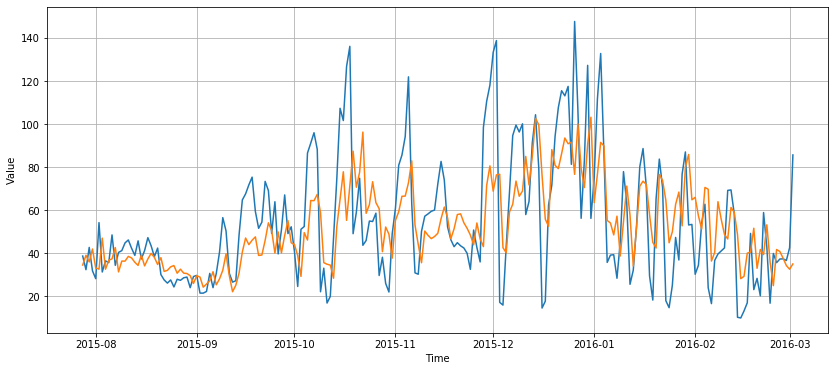

In [61]:
def plot_series(time, series, format="-", start=0, end=None):   
    plt.plot(time[start:end], series[start:end], format)    
    plt.xlabel("Time")    
    plt.ylabel("Value")    
    plt.grid(True)
plt.figure(figsize=(14, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [47]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

17.338758

### 3.4 Gradient Boosting Result Analysis(Downtown)

In [48]:
import shap
shap.initjs()

In [49]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test1)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.
The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.


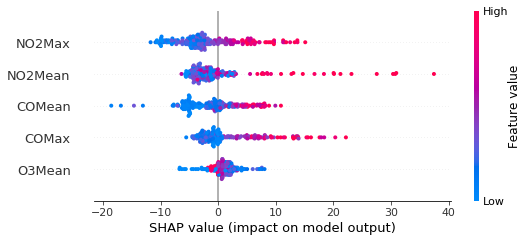

In [50]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X_test1)

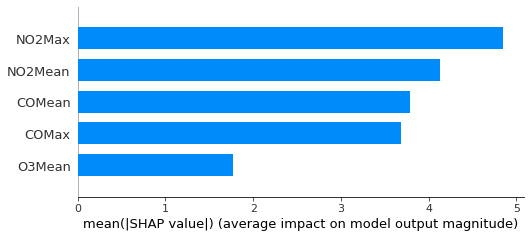

In [51]:
shap.summary_plot(shap_values,X_test1,plot_type = "bar")

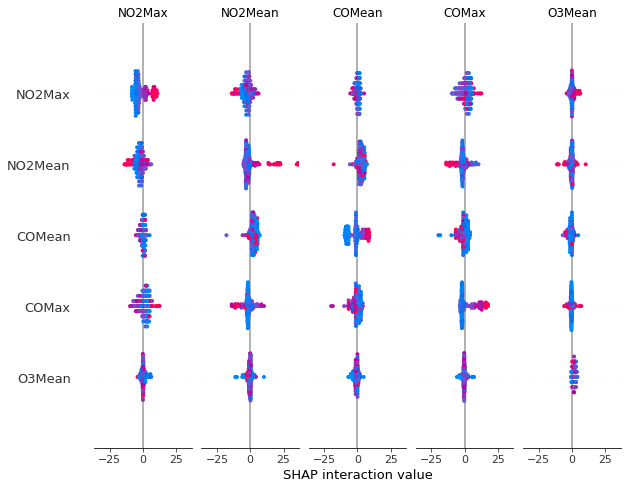

In [52]:
shap_interaction_values = explainer.shap_interaction_values(X_test1)
shap.summary_plot(shap_interaction_values, X_test1)

It is the average of the marginal contributions across all permutations. 

## Section 4 Main Findings
4.1 Daily Pattern
<br>4.2 Monthly Pattern
<br>4.3 Yeary Pattern
<br>4.4 Relationship between TMAX(maximum temperature) and the pollutants

### 4.1 Daily Pattern

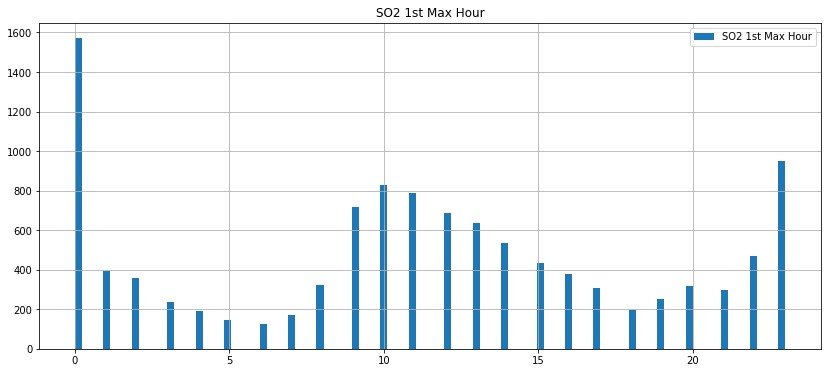

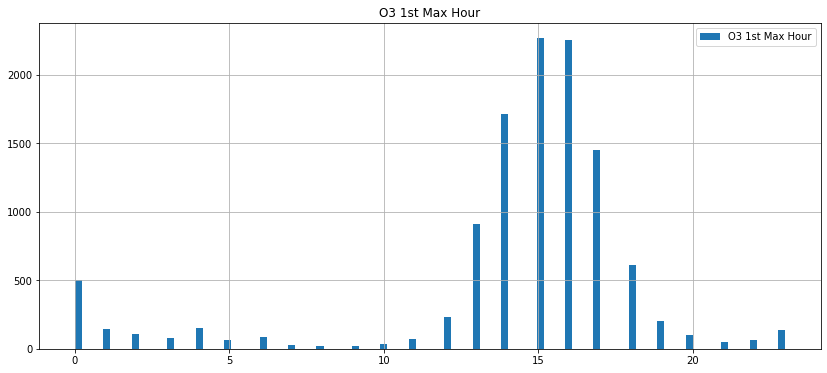

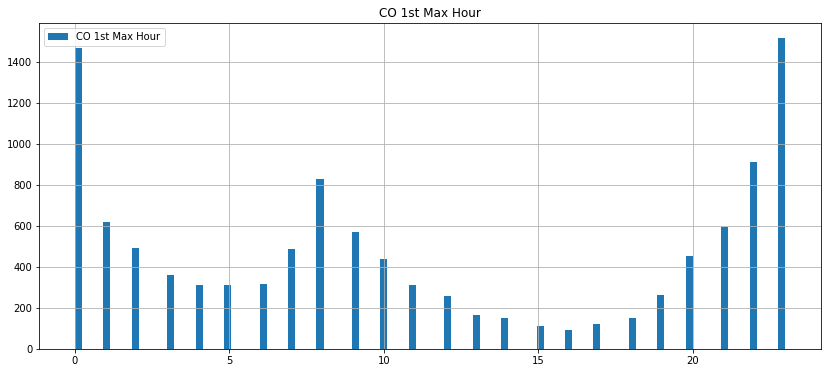

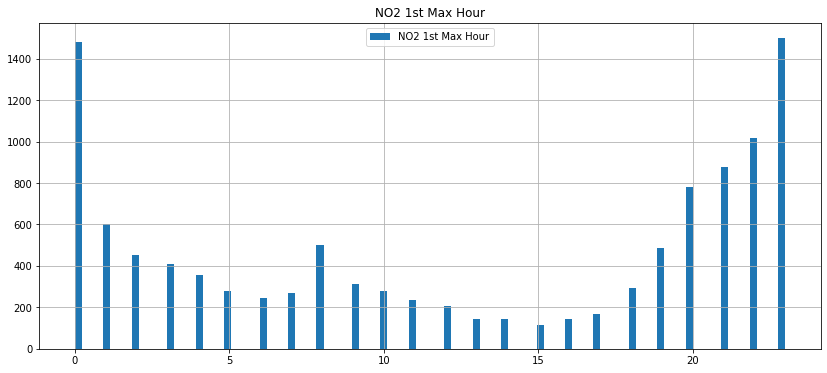

In [53]:
target1 = ['SO2 1st Max Hour']
dd = df_SO2[~df_SO2['station'].isin (countryside)].copy()
dd[target1].hist(bins=100,figsize=(14,6))
plt.legend(target1)
plt.show()

target2 = ['O3 1st Max Hour']
dd2 = df_O3[~df_O3['station'].isin (countryside)].copy()
dd2[target2].hist(bins=100,figsize=(14,6))
plt.legend(target2)
plt.show()

target3 = ['CO 1st Max Hour']
dd3 = df_CO[~df_CO['station'].isin (countryside)].copy()
dd3[target3].hist(bins=100,figsize=(14,6))
plt.legend(target3)
plt.show()

target4 = ['NO2 1st Max Hour']
dd4 = df_NO2[~df_CO['station'].isin (countryside)].copy()
dd4[target4].hist(bins=100,figsize=(14,6))
plt.legend(target4)
plt.show()

### 4.2 Monthly Pattern

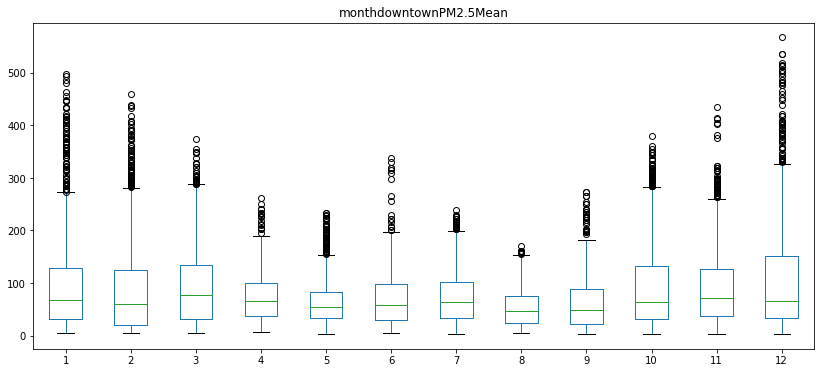

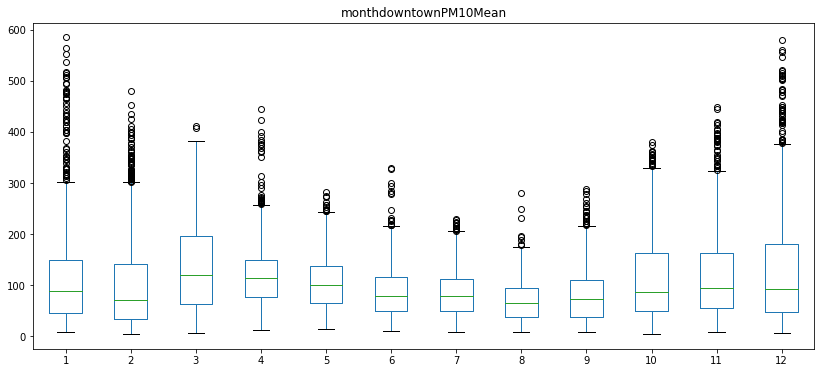

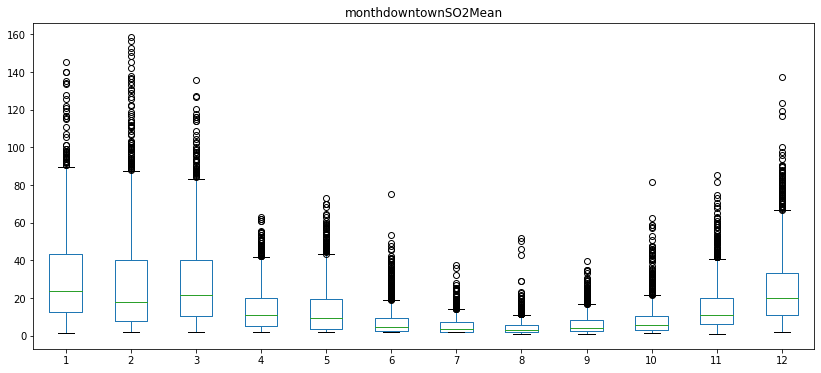

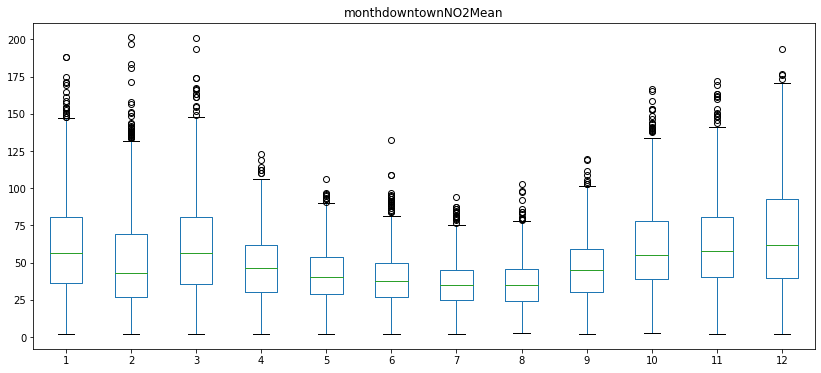

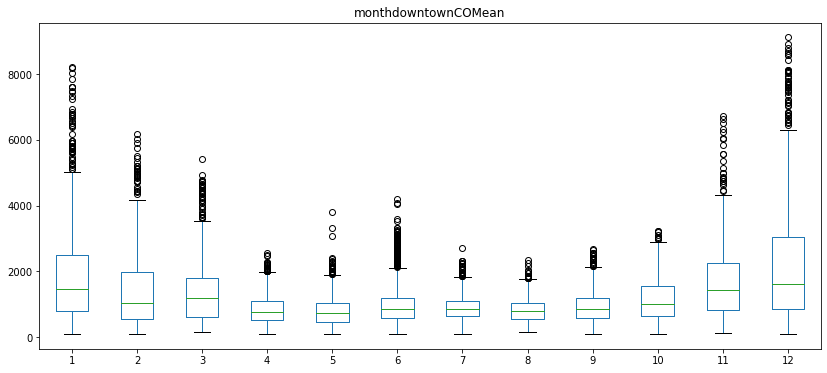

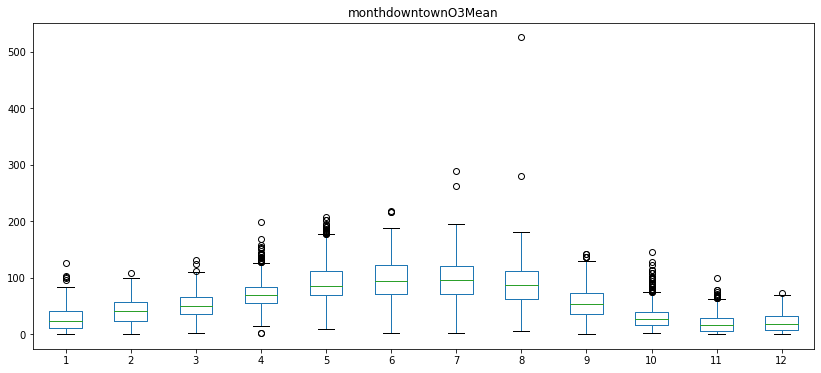

In [54]:
keys = ['PM2.5','PM10', 'SO2', 'NO2', 'CO', 'O3']
functions = ['Mean', 'Max']
def plot_month_box(df, target):
    dd = data[['month',target]]
    all_months = sorted(list(set(list(dd['month'].astype(int)))))

    ddd = pd.DataFrame(columns=all_months)
    for y in all_months:
        temp = data[data['month']==float(y)].reset_index()
        ddd[y] = temp[target]

    ddd.plot.box(figsize=(14,6),title=target)
    
for key in keys:
    data1 = data[~data['station'].isin (countryside)].copy()
    target = key+functions[0]
    plot_month_box(data1,target)
    plt.title('month'+'downtown'+target)

### 4.3 Yearly Pattern

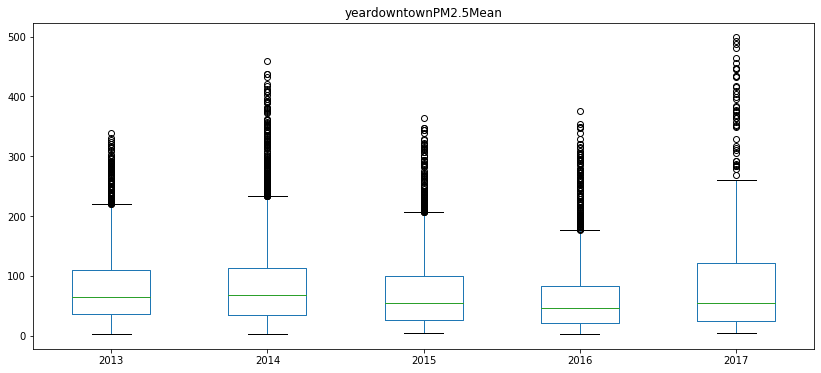

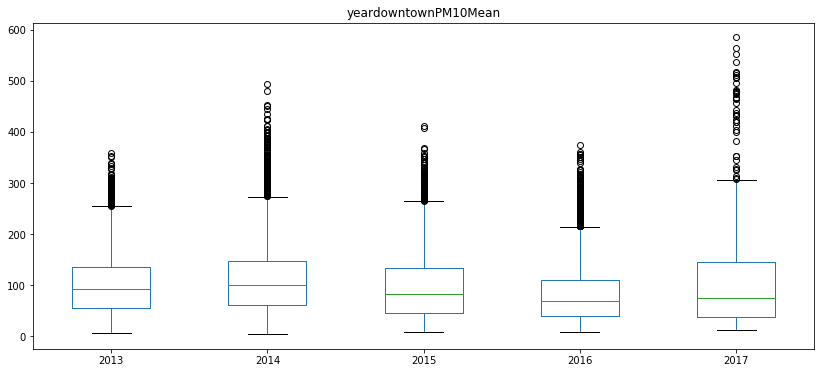

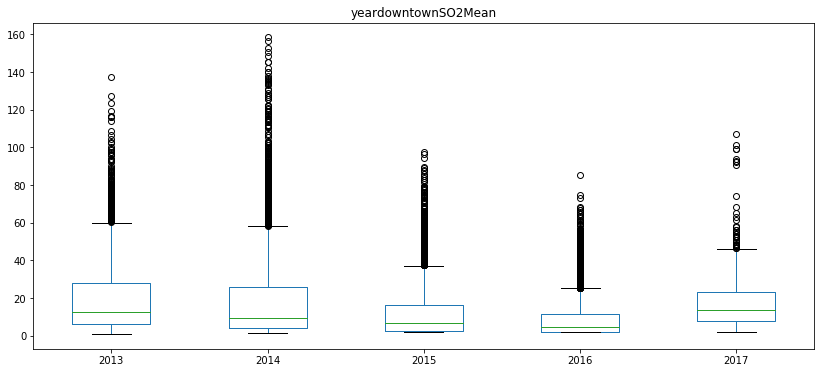

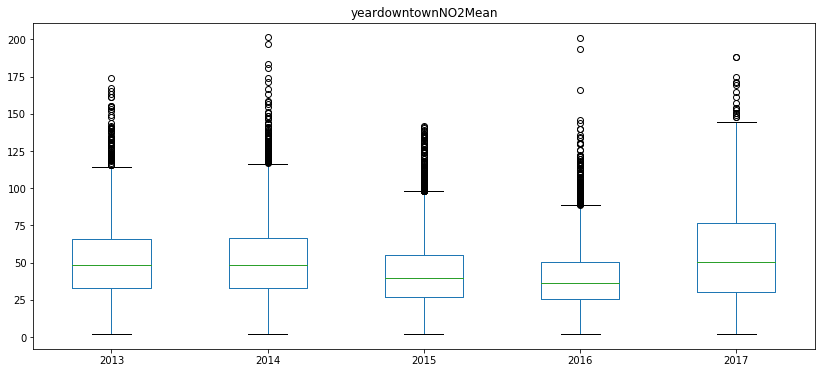

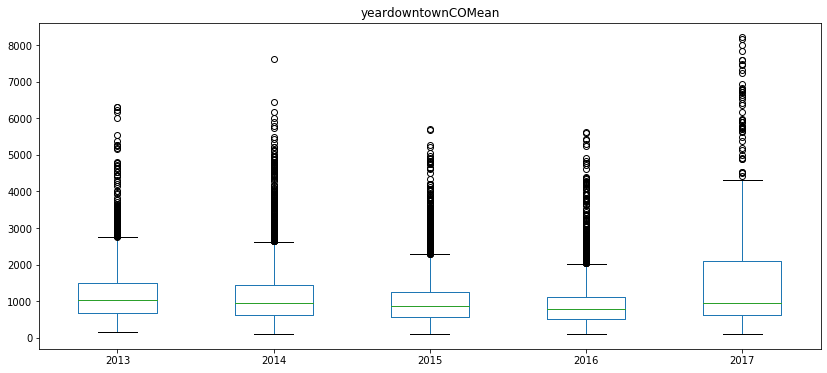

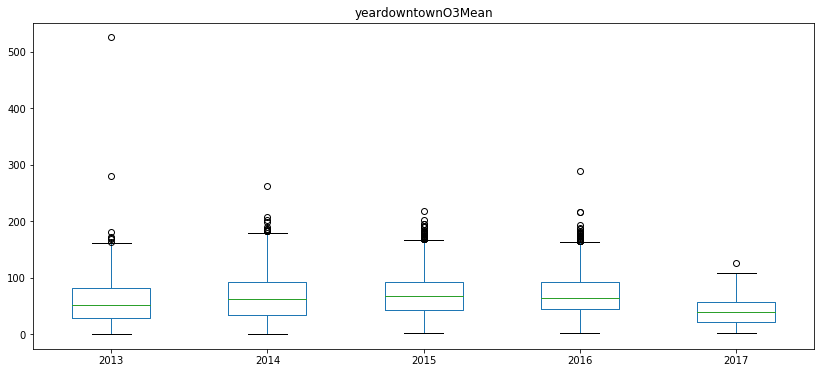

In [55]:
def plot_year_box(df, target):
    dd = data[['year',target]]
    all_years = sorted(list(set(list(data['year'].astype(int)))))

    ddd = pd.DataFrame(columns=all_years)
    for y in all_years:
        temp = data[data['year']==float(y)].reset_index()
        ddd[y] = temp[target]

    ddd.plot.box(figsize=(14,6),title=target)
for key in keys:
    df1 = data[~data['station'].isin (countryside)].copy()
    target = key+functions[0]
    plot_year_box(data1,target)
    plt.title('year'+'downtown'+target)

### 4.4 Relationship between TMAX(maximum temperature) and the pollutants

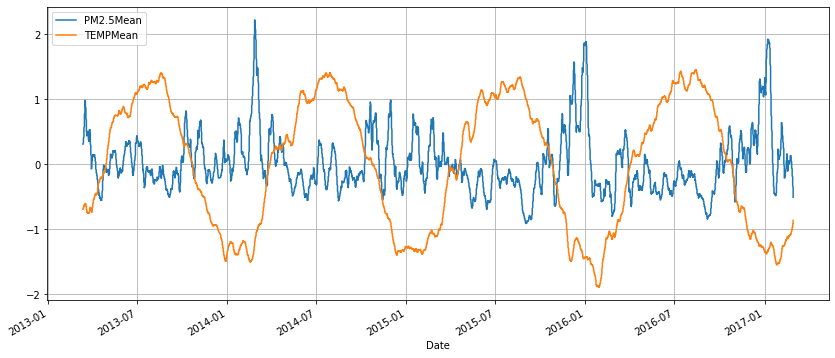

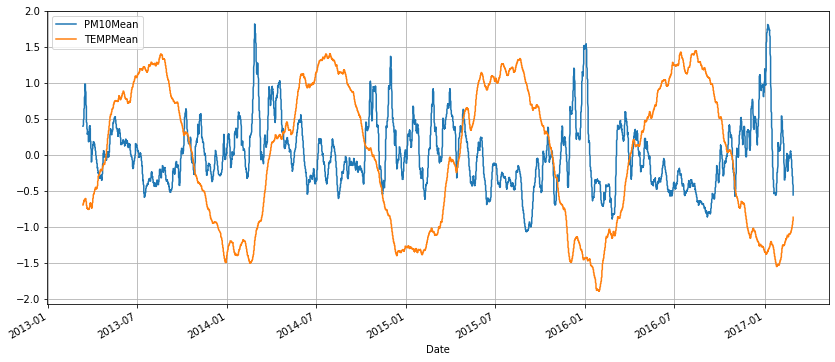

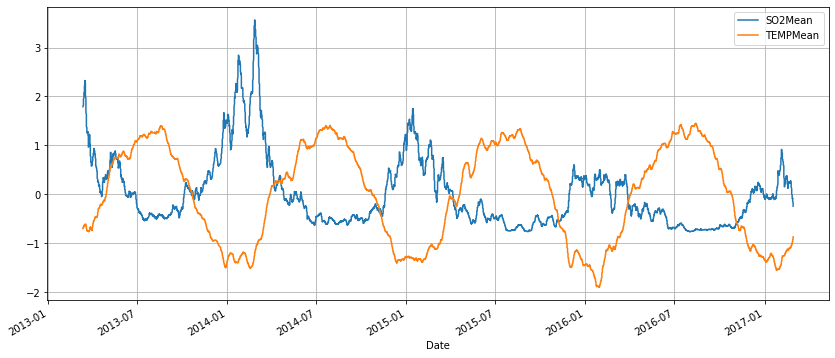

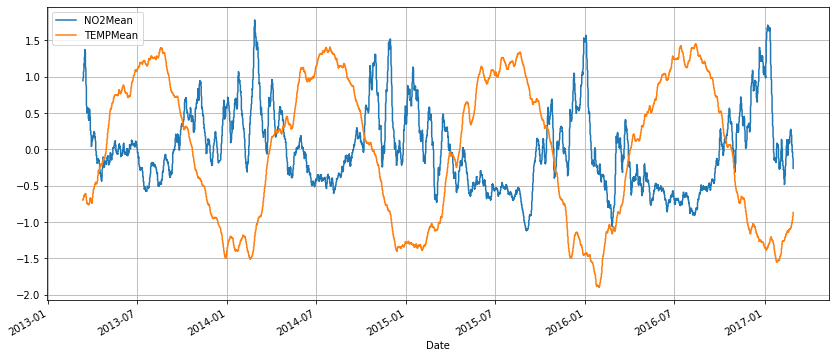

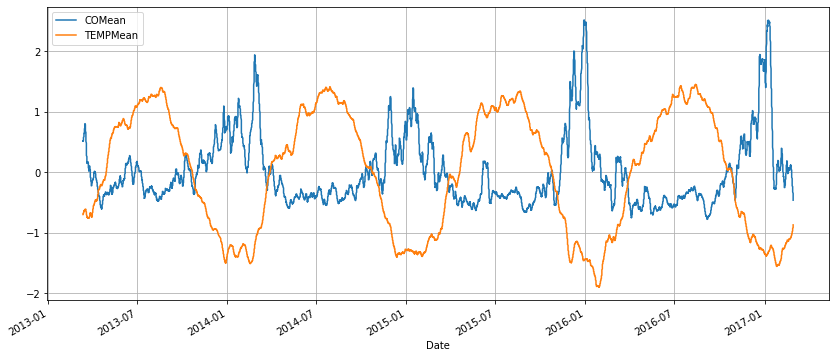

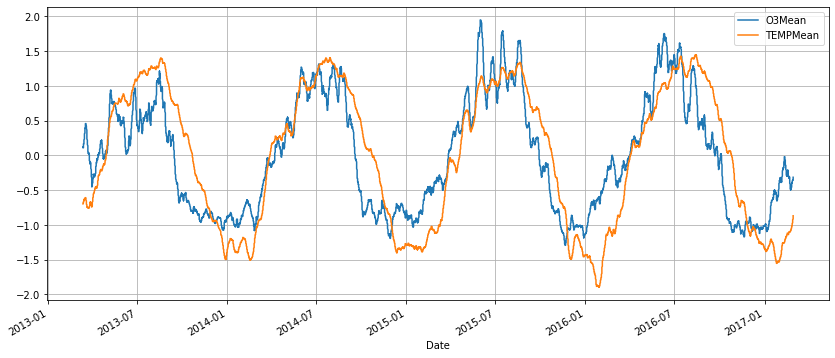

In [56]:
targets=['PM2.5Mean', 'PM10Mean', 'SO2Mean', 'NO2Mean', 'COMean', 'O3Mean']
def plot_temp_target(target):
    dd = data[~data['station'].isin (countryside)].copy()
    dd.index = dd['Date']
    dd = dd[[target,'TEMPMean']].copy()
    dd = (dd-dd.mean())/dd.std()
    dd = dd.rolling(window=100).mean()
    dd.plot(figsize=(14,6),grid=True)
for target in targets:
    plot_temp_target(target)

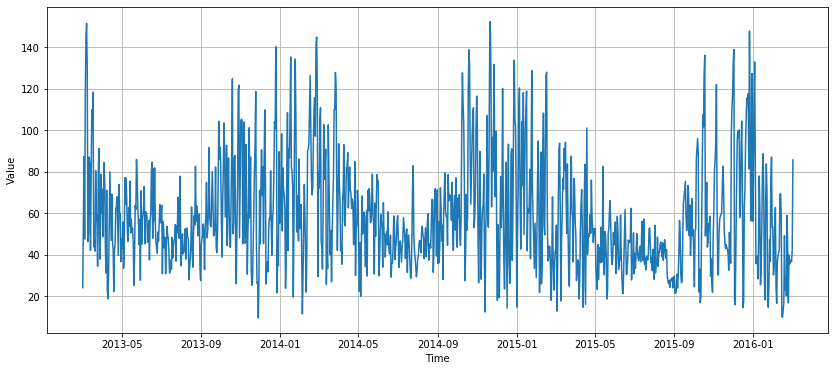

In [60]:
plt.figure(figsize=(14, 6))
plot_series(time, series)